# Mandatory Assignment 1 - Machine Learning

In [12]:
# All the imports needed for this assignment

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline


# Exercise 1.1 Data Exploration

# Q1.1.1
In the fields below, I have completed the given task:

Load the dataset into a DataFrame and display the first 5 rows.  
Print the dataset information and summary statistics.

In [2]:
# Loading the dataset into a DataFrame.
wine_data = pd.read_csv("WineQT.csv")

# Displaying the first 5 rows of the dataset, since the function head() by default shows 5 rows.
print("First 5 rows of the dataset:")
wine_data.head()

First 5 rows of the dataset:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [3]:
# Printing the dataset information.
print("Dataset information:")
wine_data.info()

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [4]:
# Printing summary statistics.
print("Summary statistics:")
wine_data.describe()

Summary statistics:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


## Q1.1.2
The feature with the highest variation based on the summary statistics is the ID, but since this is only an individual identifier in the dataset I'm disregaring the ID.
There feature with the highest variation would therefore be the "total sulfur dioxide".

This is all before scaling the dataset, something that would most likely give a different answear.

# Exercise 1.2 Correlation Analysis

## Q1.2.1
Compute the correlation matrix of all features.

In [5]:
# Computing the correlation matrix of all features
corr_matrix = wine_data.corr()
print("Correlation matrix:")
corr_matrix

Correlation matrix:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
fixed acidity,1.000000,-0.250728,0.673157,0.171831,0.107889,-0.164831,-0.110628,0.681501,-0.685163,0.174592,-0.075055,0.121970,-0.275826
volatile acidity,-0.250728,1.000000,-0.544187,-0.005751,0.056336,-0.001962,0.077748,0.016512,0.221492,-0.276079,-0.203909,-0.407394,-0.007892
citric acid,0.673157,-0.544187,1.000000,0.175815,0.245312,-0.057589,0.036871,0.375243,-0.546339,0.331232,0.106250,0.240821,-0.139011
residual sugar,0.171831,-0.005751,0.175815,1.000000,0.070863,0.165339,0.190790,0.380147,-0.116959,0.017475,0.058421,0.022002,-0.046344
chlorides,0.107889,0.056336,0.245312,0.070863,1.000000,0.015280,0.048163,0.208901,-0.277759,0.374784,-0.229917,-0.124085,-0.088099
free sulfur dioxide,-0.164831,-0.001962,-0.057589,0.165339,0.015280,1.000000,0.661093,-0.054150,0.072804,0.034445,-0.047095,-0.063260,0.095268
total sulfur dioxide,-0.110628,0.077748,0.036871,0.190790,0.048163,0.661093,1.000000,0.050175,-0.059126,0.026894,-0.188165,-0.183339,-0.107389
density,0.681501,0.016512,0.375243,0.380147,0.208901,-0.054150,0.050175,1.000000,-0.352775,0.143139,-0.494727,-0.175208,-0.363926
pH,-0.685163,0.221492,-0.546339,-0.116959,-0.277759,0.072804,-0.059126,-0.352775,1.000000,-0.185499,0.225322,-0.052453,0.132904
sulphates,0.174592,-0.276079,0.331232,0.017475,0.374784,0.034445,0.026894,0.143139,-0.185499,1.000000,0.094421,0.257710,-0.103954


## Q1.2.2
Plot a heatmap of the correlation matrix.

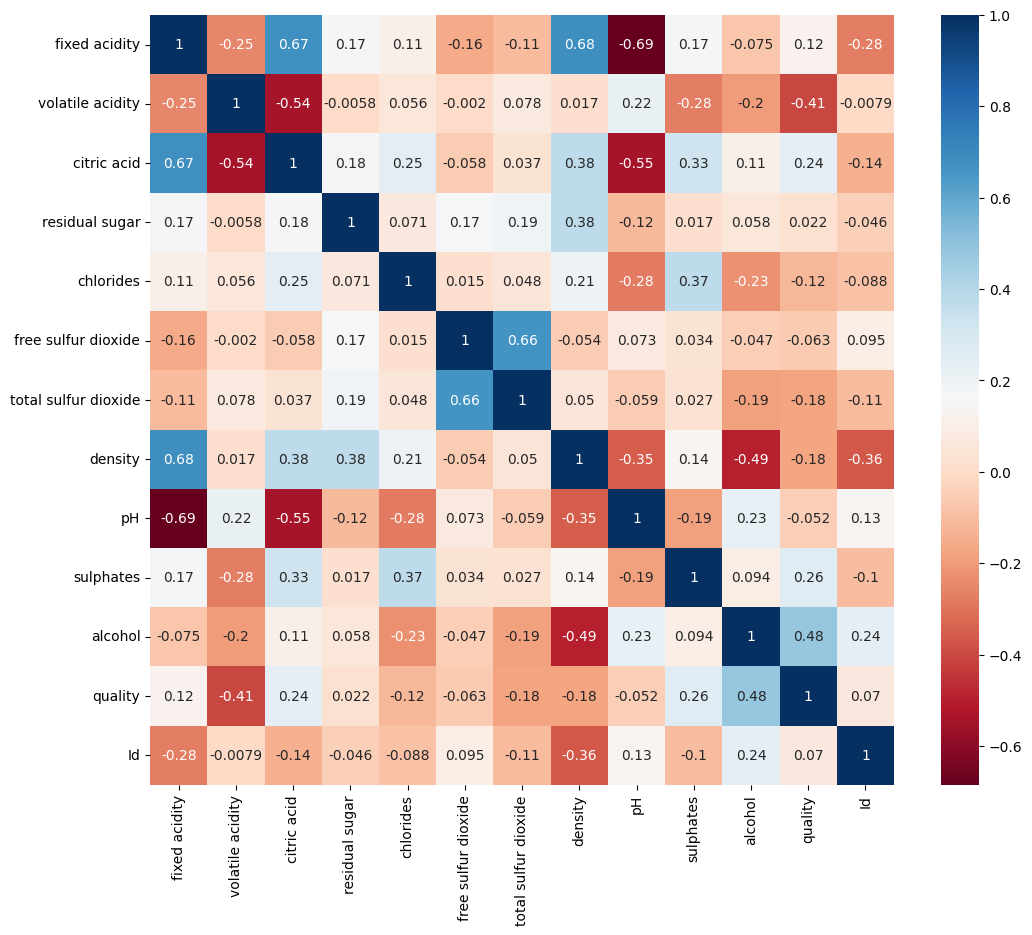

In [6]:
# Plots a heatmap of the correlation matrix using seaborn
# Stronger color towards red and blue indicates higher correlation,
# blue is a positive- and red is a negative correlation.

plt.figure(figsize=(12, 10))
sb.heatmap(corr_matrix, cmap="RdBu", annot=True)
plt.show()

## Q1.2.3
Which variable has the strongest positive correlation with quality? Which variable
has the strongest negative correlation with quality?

In [7]:
# Creates a correlation matrix with the feature "quality" as the referance.
# Sorting the list of correlations in a descending order.

corr_matrix_quality = corr_matrix["quality"].sort_values(ascending=False)
corr_matrix_quality

quality                 1.000000
alcohol                 0.484866
sulphates               0.257710
citric acid             0.240821
fixed acidity           0.121970
Id                      0.069708
residual sugar          0.022002
pH                     -0.052453
free sulfur dioxide    -0.063260
chlorides              -0.124085
density                -0.175208
total sulfur dioxide   -0.183339
volatile acidity       -0.407394
Name: quality, dtype: float64

The feature with the highest positive correlation with quality is alcohol at 0,48 (rounded).
The feature with the highest negative correlation with quality is volatile acidity at -0,41 (rounded).

I'm not taking quality it self into considuration, since it will always have a correlation of 1 with itself.

It is my statement that alcohol is a better indicator for predicting the wine quality. This is because alcohol has a higher absolute value of correlation.  
We are refearing to the absolute value, since it's the magnitude of correlation we're looking at.  
Alcohol has a correlation of (0,48) rounded.  
pH has a correlation of (-0,05) rounded.  
  
When a correlation is higher it indicates that quality in this instance, goes up or down with the other feature. The higher the correlation, the linear the rate of change between the two.  
When the correlation is negativ, it means that the two features goes in opposite direction; when on goes up, the other goes down.  
  
Since alcohol has a higher magnitude of correlation, it will be the best predictor of wine quality of the two.

# 1.3 Linear Regression

## Q1.3.1
Fit a simple linear regression model using gradient descent to predict quality using
only chlorides.

In this task I will be using Stochastic Gradient Descent in the linear reggression.

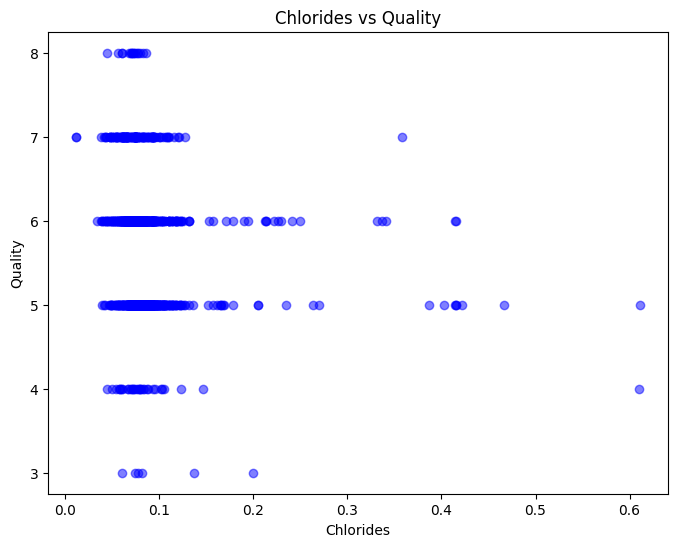

In [8]:
# A figure showing the relationship between "chlorides" and "quality".

x = wine_data[["chlorides"]]  # Feature
y = wine_data["quality"]      # Target

plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='blue', alpha=0.5)
plt.title("Chlorides vs Quality")
plt.xlabel("Chlorides")
plt.ylabel("Quality")
plt.show()



Intercept: [5.65444278]
Coefficient: [-0.10118417]


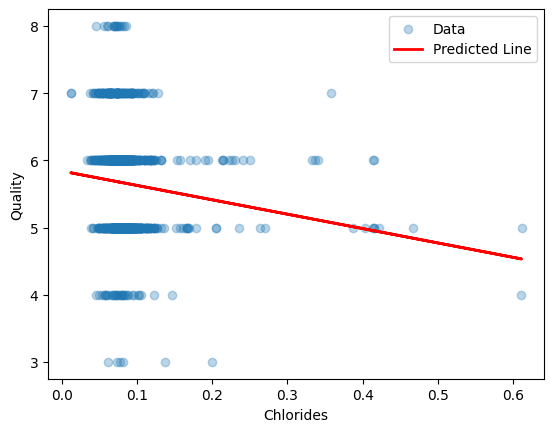

In [9]:
# A simple linear regression model using "chlorides" to predict "quality", using gradient descent.
# Scaling the data before training.

# Feature and target variables
X = wine_data[['chlorides']].values  
y = wine_data['quality'].values      

# Scaling the feature
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Linear regression with Gradient descent
sgd_reg = SGDRegressor(
    max_iter = 1000,        # Max number of itterations
    tol = 1e-5,             # Stopping point for when improvement gets small
    penalty = None,         # No regulation of the training, just linear regression
    eta0 = 0.01,            # Learning rate
    n_iter_no_change = 100, # 
    random_state = 42       # Setting a number for the randomization for consistancy
)

# Training the model on the provided data
sgd_reg.fit(X_scaled, y)

print("Intercept:", sgd_reg.intercept_)
print("Coefficient:", sgd_reg.coef_)

# Testing the model and its predictions
y_pred = sgd_reg.predict(X_scaled)

plt.scatter(X, y, alpha=0.3, label="Data")
plt.plot(X, y_pred, color="red", linewidth=2, label="Predicted Line")
plt.xlabel("Chlorides")
plt.ylabel("Quality")
plt.legend()
plt.show()


## Q1.3.2
Fit a simple linear regression model predicting quality using only alcohol.

In this task I will only be using a simple linear reggression, since the task does not specify otherwise.

Intercept: 1.8870128607874057
Coefficient: [0.36104097]


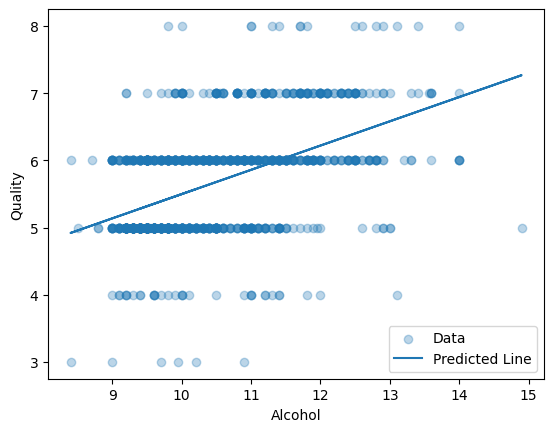

In [10]:
# A simple linear reggression model predicting wine quality using only alcohol.
# This model only uses basic linear regression with sklearn.

# Feature and target
X = wine_data[["alcohol"]].values   # Feature
y = wine_data["quality"].values     # Target

# Scaling the data
#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X)

# Setting up the model and inputing the data
lin_reg = LinearRegression()
lin_reg.fit(X, y)

# Printing the values og intercept and coefficient
print("Intercept:", lin_reg.intercept_)
print("Coefficient:", lin_reg.coef_)

# Prediction from the model
y_pred = lin_reg.predict(X)

# Plotting and showing the ressult

plt.scatter(X, y, alpha=0.3, label="Data")
plt.plot(X, y_pred, label="Predicted Line")
plt.xlabel("Alcohol")
plt.ylabel("Quality")
plt.legend()
plt.show()


## Q1.3.3
Report the regression coefficient and intercept and compare both the models.


Using chlorides produces these values:  
Intercept: 5.65  
Coefficient: -0.10  

Using Alcohol produces these values:  
Intercept: 1.887  
Coefficient: 0.36  
  
The intercept number represent what the quality would be in if the feature where to hypothetical be equal to zero, in a mathematical sense.  
The coefficient represent the rate of change when the feature increases.  
  
What we can see is that chlorides has a small negative effect on the quality of the wine, as the coefficient is -0.10.  
While alcohol has a larger positive effect on quality as the coefficient is 0.36.  
This also confirms that correlation analysis that more alchol increases quality and chlorides decreases quality.  
  
Since alcohol has a much larger absolute value of coeffisient, we can safely assume that alcohol is a stronger indicator for the wine quality.


## Q1.3.4
Plot the regression line against the data points. Does the regression line fit the
data well for chlorides or alcohol? Why or why not?

I have plotted the reggression lines together with their respective code in Q1.3.1 and Q1.3.2.  
  
For chlorides the reggression line does not fit the data well, since we can see that there are very few datapoints as feature goes up. The datapoints indicate the the quality does not seam to be affected by low values of chlorides.  
  
For alcohol the regression line does fit the data in some regard, as it would seems that the quality slightly increases when there is more alcohol. But we can also see that the wine quality is constant at different alcohol values. This can be seen as long, near constant, horizontal lines in the figure. This shows that the datasett has a large spread around the line. Therefore alchol is not a good indicator of quality as a single feature.  
  
Alcohol is a better predictor than chlorides, but still not a very strong predictor on its own. At high chlorides values, quality tends to remain low, which the line captures, but since there are few data points at high values of chlorides, this relationship is less reliable.

# 1.4 Train-Test Split

Split the dataset into training (80%) and test (20%) sets in 5 different folds. Train the
simple linear regression model (using gradient descent) for each split on the train-test
data in each fold. Evaluate the model on the test set in each fold using:  
• Mean Squared Error (MSE)  
• Root Mean Squared Error (RMSE)  
• $R^2$ score

In [27]:
# Doing a Cross Validation with Gradient Descent as the traing type.
# Splitting the data into 5 folds, without a separate test set since the task at hand does not need it.
# Using the features Alcohol and Chlorides, in each their own model, to predict the Quality.
# Each model will be evaluted on MSE, RMSE and R^2
# Will be using sklearn libary.

# The feature and target
X_alcohol = wine_data[["alcohol"]].values   # Feature
X_chlorides = wine_data[["chlorides"]].values  # Feature
y = wine_data["quality"].values     # Target

# Pipeline that scales the data and uses SGDRegressor
pipeline = make_pipeline(StandardScaler(), SGDRegressor(
    max_iter=1000,              # Max number of itterations
    tol=1e-5,                   # Stopping point for when improvement gets small
    penalty=None,               # No regulation of the training,  just linear regression
    eta0=0.01,                  # Learning rate
    random_state=42             # Setting a number for the randomization for consistancy
))

# Creating folds with 5 splits and shuffling the data
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Lists to store the scores
scoring = {
    'MSE': 'neg_mean_squared_error',
    'RMSE': 'neg_root_mean_squared_error',
    'R2': 'r2'
}

# Performing cross-validation for Alcohol
cv_results = cross_validate(pipeline, X_alcohol, y, cv=cv, scoring=scoring)

# Extracting the scores for Alcohol
mse_scores = -cv_results['test_MSE']  # Negating because sklearn returns negative MSE
rmse_scores = -cv_results['test_RMSE']  # Negating because sklearn returns negative RMSE
r2_scores = cv_results['test_R2']

# Printing the scores for Alcohol
print("Cross-Validation Results for Alcohol:")

print(f"MSE Scores: {mse_scores}")
print(f"RMSE Scores: {rmse_scores}")
print(f"R^2 Scores: {r2_scores}\n")

print(f"Average MSE: {np.mean(mse_scores)}")
print(f"Average RMSE: {np.mean(rmse_scores)}")
print(f"Average R^2: {np.mean(r2_scores)}\n")

print(f"Variance in MSE: {np.var(mse_scores)}")
print(f"Variance in RMSE: {np.var(rmse_scores)}")
print(f"Variance in R^2: {np.var(r2_scores)}\n")

# Performing cross-validation for Chlorides
cv_results = cross_validate(pipeline, X_chlorides, y, cv=cv, scoring=scoring)

# Extracting the scores for Chlorides
mse_scores = -cv_results['test_MSE']  # Negating because sklearn returns negative MSE
rmse_scores = -cv_results['test_RMSE']  # Negating because sklearn returns negative RMSE
r2_scores = cv_results['test_R2']

# Printing the scores for Chlorides
print("Cross-Validation Results for Chlorides:")

print(f"MSE Scores: {mse_scores}")
print(f"RMSE Scores: {rmse_scores}")
print(f"R^2 Scores: {r2_scores}\n")

print(f"Average MSE: {np.mean(mse_scores)}")
print(f"Average RMSE: {np.mean(rmse_scores)}")
print(f"Average R^2: {np.mean(r2_scores)}\n")

print(f"Variance in MSE: {np.var(mse_scores)}")
print(f"Variance in RMSE: {np.var(rmse_scores)}")
print(f"Variance in R^2: {np.var(r2_scores)}\n")


Cross-Validation Results for Alcohol:
MSE Scores: [0.41730971 0.58996566 0.51447612 0.49987638 0.46279561]
RMSE Scores: [0.64599513 0.76809222 0.71726991 0.70701936 0.68029083]
R^2 Scores: [0.25008092 0.19886092 0.24082272 0.26766131 0.213252  ]

Average MSE: 0.4968846958464006
Average RMSE: 0.7037334901292912
Average R^2: 0.23413557402908997

Variance in MSE: 0.0032953433996140815
Variance in RMSE: 0.001643870716847478
Variance in R^2: 0.0006206743088286358

Cross-Validation Results for Chlorides:
MSE Scores: [0.55939428 0.72661809 0.65906773 0.66654065 0.5913166 ]
RMSE Scores: [0.74792665 0.85241896 0.81182987 0.81641941 0.76897113]
R^2 Scores: [-0.00524965  0.01329486  0.02745875  0.02349155 -0.00523241]

Average MSE: 0.6405874688853807
Average RMSE: 0.7995132036860235
Average R^2: 0.01075262010191671

Variance in MSE: 0.0034872617608324536
Variance in RMSE: 0.001366106017091914
Variance in R^2: 0.0001918863693854396



## Q1.4.1
How well does alcohol alone predict wine quality in each split?  
  
Answear:  
Alcohol alone had these result in the 5 folds:  
MSE Scores: [0.41730971 0.58996566 0.51447612 0.49987638 0.46279561]  
RMSE Scores: [0.64599513 0.76809222 0.71726991 0.70701936 0.68029083]  
R^2 Scores: [0.25008092 0.19886092 0.24082272 0.26766131 0.213252  ]  
  
With these avrages (rounded):  
RMSE = 0.70  
$r^2$ = 0.23  
  
The model based on alcohol alone, using a SGD linear regression has a avarage missing rate of 0.70 points on the wine quality scale. This meens that the model has some accuracy in predicting the wine quality.  
Since the $r^2$ is as low as 0.23 the model is not very good at explaining the variance in the data, but this number indicates that alchole is a weak but relevant indicator for wine quality.

# Q1.4.2
How well does chloride alone predict wine quality in each split?  
  
Answear:  
Chloride had these results in the 5 folds:  
MSE Scores: [0.55939428 0.72661809 0.65906773 0.66654065 0.5913166 ]  
RMSE Scores: [0.74792665 0.85241896 0.81182987 0.81641941 0.76897113]  
R^2 Scores: [-0.00524965  0.01329486  0.02745875  0.02349155 -0.00523241]  
  
With these avrages (rounded):  
RMSE = 0.80  
$r^2$ = 0.01  
  
Chloride alone is not a good predictor of the wine quality. On average it misses more than alcohol, with its RMSE of 0.80. In addition to that, chloride has a $r^2$ of 0.01. This means that the model based on chloride guesses most of the time, since it can't explain almost any of the variance in the data.

# Q1.4.3
Do you think the model underfits? Why?  
  
Answear:  
Yes, the models underfit the data. This is because predicting the wine quality is to complex for only one feature. This is something we can observe for both cholrine and alcohol. They both have a higher miss rate (the RMSE) of 0.8 and 0.7, combined with low $r^2$ where chlorine is as low as 0.01. This means that the model cannot explain the variance in the data, something that indicates underfitting.

# Q1.4.4
Provide the mean and variance from the 5 different folds and comment on the
variation in performance across all 5 folds when using alcohol versus chloride.  
  
Answear:  
The cross validation gave the following average and variance from the 5 folds.  
  
Alcohol:  
Average MSE: 0.4968846958464006  
Average RMSE: 0.7037334901292912  
Average R^2: 0.23413557402908997  
  
Variance in MSE: 0.0032953433996140815  
Variance in RMSE: 0.001643870716847478  
Variance in R^2: 0.0006206743088286358  
  
Chloride:  
Average MSE: 0.6405874688853807  
Average RMSE: 0.7995132036860235  
Average R^2: 0.01075262010191671  
    
Variance in MSE: 0.0034872617608324536  
Variance in RMSE: 0.001366106017091914  
Variance in R^2: 0.0001918863693854396  
  
Both models have low variance throughout the folds. This indicates that the their performance is stable in predicting the wine quality - regardless of how well they actually predict the wine quality.  
Alcohol is however the better indicator and model since it has a higher $r^2$ and lower RMSE.